# L-SHADE

In [11]:
from scipy.stats import wilcoxon
import pandas as pd
import numpy as np

from lshade import parse_results, analyze_results, plot_results, METHODS

In [12]:
errors = []

### Linear congruential

In [13]:
filename = "results/linear_congruential.txt"
lcg_results = parse_results(filename)

summary, lcg_errors = analyze_results(lcg_results)
errors.append(lcg_errors)
summary

,Function,Mean Error,Std Error,Minimum,Maximum,CV,Dimension,Num_Runs
0,F1,100.000000,0.000000,100.00000,100.000000,0.000000,10,51
1,F2,1106.961120,4.561391,1100.35896,1118.822940,0.004121,10,51
2,F3,712.113823,0.576765,711.16874,713.642614,0.000810,10,51
3,F4,1900.397820,0.067384,1900.25498,1900.545930,0.000035,10,51
4,F5,1700.771120,0.680769,1700.00000,1702.614350,0.000400,10,51
5,F6,1600.400140,0.218291,1600.01995,1601.160010,0.000136,10,51
6,F7,2100.370440,0.288846,2100.00057,2101.112970,0.000138,10,51
7,F8,2298.993160,7.119444,2248.65109,2300.000000,0.003097,10,51
8,F9,2686.379200,90.885189,2500.00000,2734.296040,0.033832,10,51
9,F10,2912.347100,21.273537,2897.74287,2945.803260,0.007305,10,51


### Mersenne Twister

In [14]:
filename = "results/mersenne_twister.txt"
mt_results = parse_results(filename)

summary, mt_errors = analyze_results(mt_results)
errors.append(mt_errors)
summary

,Function,Mean Error,Std Error,Minimum,Maximum,CV,Dimension,Num_Runs
0,F1,100.00000,0.000000,100.000000,100.000000,0.000000,10,51
1,F2,1109.26201,6.094274,1100.206450,1133.780270,0.005494,10,51
2,F3,712.25695,0.629058,711.166812,713.628785,0.000883,10,51
3,F4,1900.41188,0.074479,1900.170190,1900.544230,0.000039,10,51
4,F5,1701.64906,2.252370,1700.000000,1711.172960,0.001324,10,51
5,F6,1600.37147,0.231268,1600.023770,1601.180740,0.000145,10,51
6,F7,2100.35830,0.270140,2100.000000,2101.124270,0.000129,10,51
7,F8,2298.04491,13.865702,2200.000000,2300.290160,0.006034,10,51
8,F9,2700.91687,74.934673,2500.000000,2733.173080,0.027744,10,51
9,F10,2908.80324,19.502639,2897.742870,2945.792940,0.006705,10,51


### True random

In [15]:
filename = "results/true_random.txt"
true_results = parse_results(filename)

summary, true_errors = analyze_results(true_results)
errors.append(true_errors)
summary

,Function,Mean Error,Std Error,Minimum,Maximum,CV,Dimension,Num_Runs
0,F1,100.000000,0.000000e+00,100.000000,100.000000,0.000000e+00,10,51
1,F2,1109.287780,6.808534e+00,1100.462460,1132.044020,6.137753e-03,10,51
2,F3,712.145109,7.032830e-01,710.659909,714.374413,9.875557e-04,10,51
3,F4,1900.378910,6.788976e-02,1900.237650,1900.566570,3.572433e-05,10,51
4,F5,1700.835530,6.072638e-01,1700.208140,1702.614350,3.570385e-04,10,51
5,F6,1600.422140,2.530437e-01,1600.013230,1601.176550,1.581106e-04,10,51
6,F7,2100.397470,2.774334e-01,2100.000120,2101.124350,1.320862e-04,10,51
7,F8,2300.000000,3.767204e-13,2300.000000,2300.000000,1.637915e-16,10,51
8,F9,2699.061290,7.940745e+01,2500.000000,2734.623320,2.942039e-02,10,51
9,F10,2914.997340,2.204318e+01,2898.008990,2945.803260,7.561989e-03,10,51


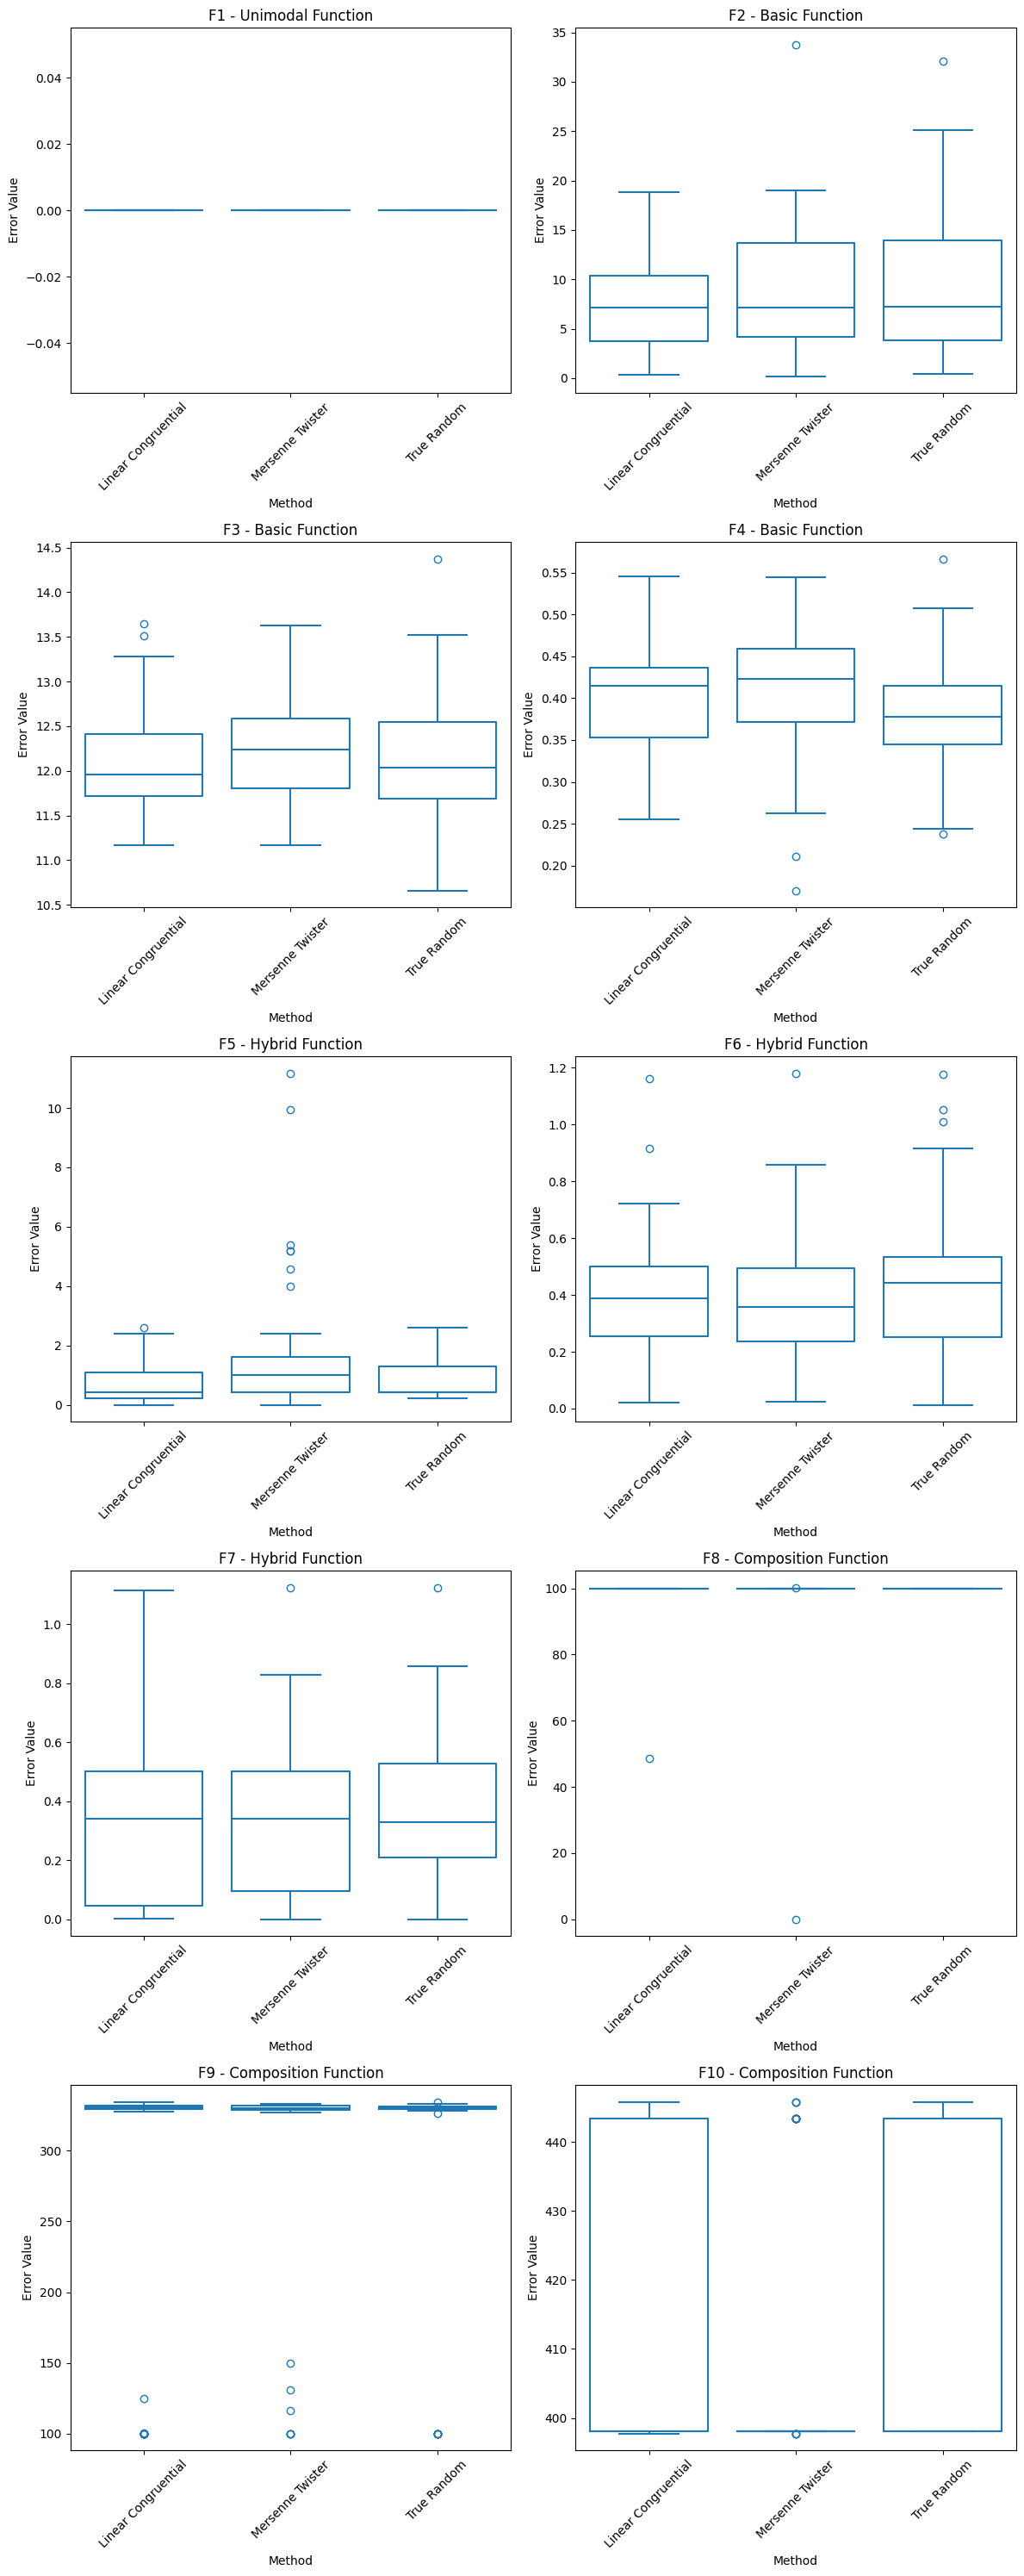

In [16]:
all_errors = []
for i, df in enumerate(errors):
    df_copy = df.copy()
    df_copy["Method"] = METHODS[i]
    all_errors.append(df_copy)

combined_errors = pd.concat(all_errors, ignore_index=True)
plot_results(combined_errors, "../imgs/box_lshade.png")

### Wilcoxon signed-rank test

In [17]:
lcg = [np.array(lcg_results[i]["error_values"]) for i in range(1, 11)]
mt = [np.array(mt_results[i]["error_values"]) for i in range(1, 11)]
true = [np.array(true_results[i]["error_values"]) for i in range(1, 11)]

In [18]:
for i in range(1, 10):
    print(f"--- Function {i+1} ---")

    res = wilcoxon(true[i], lcg[i])
    print(f"\tTrue Random vs Linear Congruential: statistic = {res.statistic:.2f}, p-value = {res.pvalue:.2f}")
    res = wilcoxon(true[i], mt[i])
    print(f"\tTrue Random vs Mersenne-Twister: statistic = {res.statistic:.2f}, p-value = {res.pvalue:.2f}")
    res = wilcoxon(lcg[i], mt[i])
    print(f"\tLinear Congruential vs Mersenne-Twister: statistic = {res.statistic:.2f}, p-value = {res.pvalue:.2f}\n")

--- Function 2 ---
	True Random vs Linear Congruential: statistic = 473.00, p-value = 0.07
	True Random vs Mersenne-Twister: statistic = 621.00, p-value = 0.69
	Linear Congruential vs Mersenne-Twister: statistic = 458.00, p-value = 0.05

--- Function 3 ---
	True Random vs Linear Congruential: statistic = 617.00, p-value = 0.67
	True Random vs Mersenne-Twister: statistic = 555.00, p-value = 0.31
	Linear Congruential vs Mersenne-Twister: statistic = 545.00, p-value = 0.27

--- Function 4 ---
	True Random vs Linear Congruential: statistic = 520.00, p-value = 0.18
	True Random vs Mersenne-Twister: statistic = 409.00, p-value = 0.02
	Linear Congruential vs Mersenne-Twister: statistic = 519.00, p-value = 0.18

--- Function 5 ---
	True Random vs Linear Congruential: statistic = 311.00, p-value = 0.27
	True Random vs Mersenne-Twister: statistic = 300.00, p-value = 0.09
	Linear Congruential vs Mersenne-Twister: statistic = 339.50, p-value = 0.04

--- Function 6 ---
	True Random vs Linear Congru